# **Análisis exploratorio de datos históricos de la Fórmula 1**

Este proyecto presenta un análisis exploratorio de datos (EDA) basado en información histórica de la Fórmula 1 desde 1950 hasta 2024. A partir de múltiples archivos CSV con datos sin procesar, se ha llevado a cabo un proceso de limpieza, estructuración y análisis con el objetivo de extraer información relevante y poner en contexto distintas métricas del campeonato.

El análisis aborda tanto cuestiones generales del deporte, como la evolución de los resultados, el rendimiento de pilotos y escuderías, o las características de los circuitos, como un estudio más específico centrado en la trayectoria deportiva (hasta la fecha) de dos de los pilotos más relevantes de la era moderna: Lewis Hamilton y Fernando Alonso.

La estructura del análisis es la siguiente:

- Carga de los datos y análisis exploratorio inicial para comprender la distribución y calidad del dataset.

- Estudio de los resultados a lo largo del tiempo, tanto a nivel global como en periodos recientes, incluyendo una comparación directa entre Lewis Hamilton y Fernando Alonso.

- Análisis del rendimiento de las escuderías y su evolución histórica.

- Evaluación de las características de los circuitos y su impacto en el desarrollo de las carreras.

- Comparación del rendimiento de Lewis Hamilton y Fernando Alonso frente al resto de pilotos en las carreras en las que han competido.

## **1. Carga de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
tipo_datos = {
    'driverRef':'string',
    'code':'string',
    'forename':'string',
    'surname':'string',
    'nationality':'category'
}

df_drivers = pd.read_csv('data/drivers.csv',
                         index_col = 'driverId',
                         na_values = '\\N',
                         dtype = tipo_datos,
                         parse_dates = ['dob'])

df_drivers.head()

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [22]:
df_races = pd.read_csv('data/races.csv',
                       index_col='raceId',
                       na_values='\\N',
                       parse_dates=['date'])

df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_results = pd.read_csv('data/results.csv',
                         index_col = 'resultId',
                         na_values = '\\N')

df_results.head()

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


In [28]:
df_status = pd.read_csv('data/status.csv')
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


Vamos a extraer los datos relativos a Lewis Hamilton y Fernando Alonso, cuyos códigos son `HAM` y `ALO` respectivamente, y almacenarlos para futuras consultas

In [35]:
hamilton_data = df_drivers[df_drivers['code']=='HAM'].reset_index().iloc[0]
alonso_data = df_drivers[df_drivers['code']=='ALO'].reset_index().iloc[0]

hamilton_id = hamilton_data['driverId']
alonso_id = alonso_data['driverId']

Antes de empezar con el análisis, vamos a hacernos una idea de cómo está distribuida nuestra base de datos a nivel de pilotos

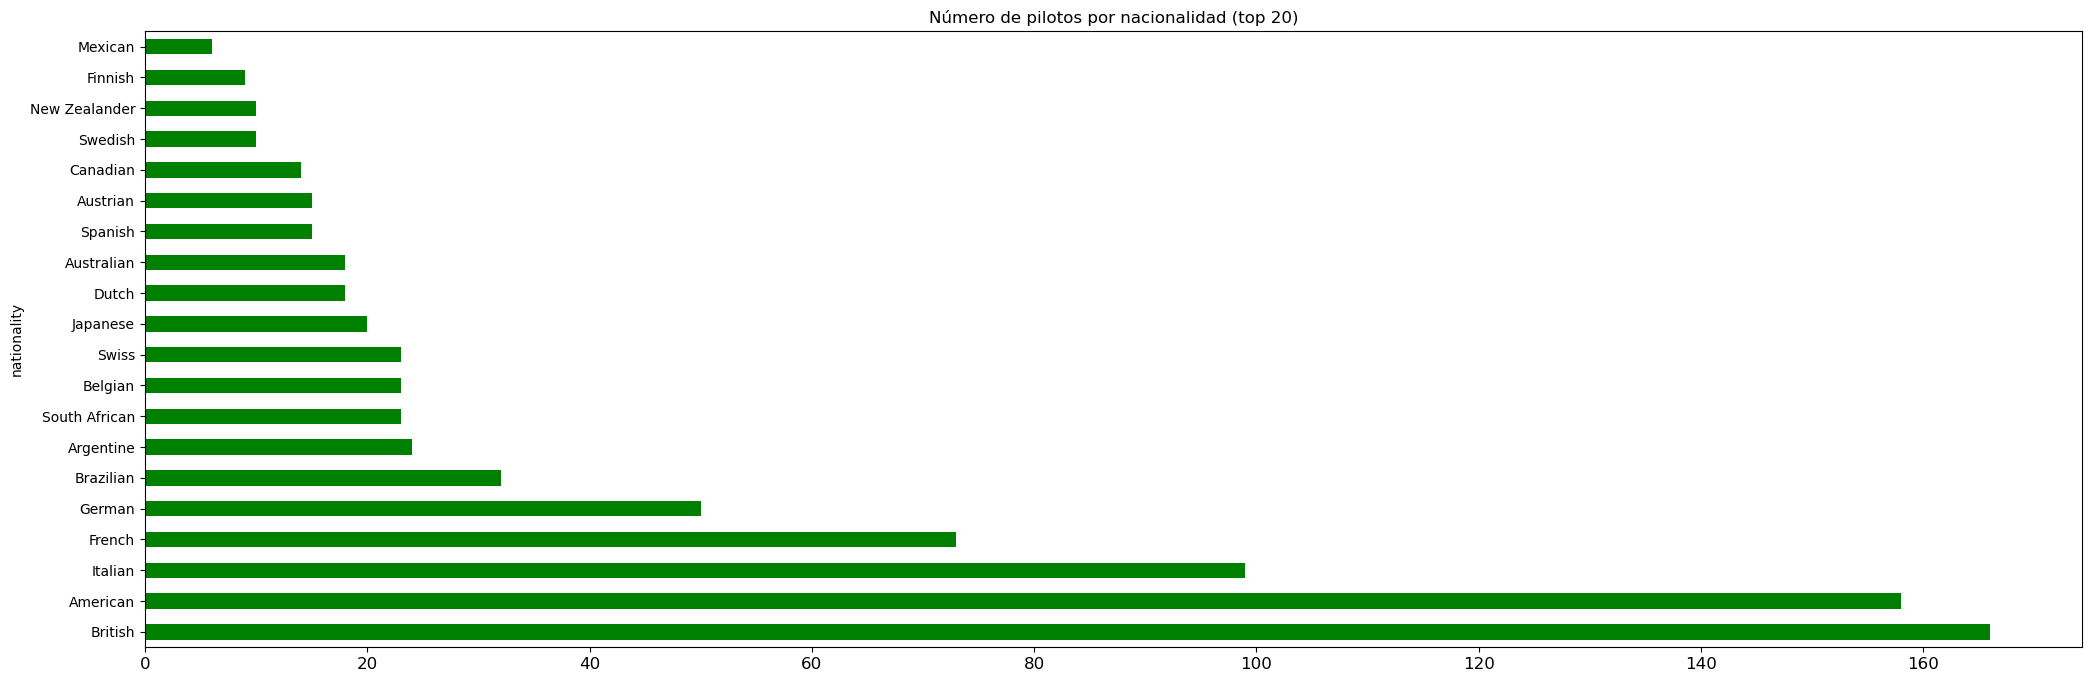

In [128]:
df_drivers['nationality'].value_counts().head(20).plot(kind='barh', color='green', title='Número de pilotos por nacionalidad (top 20)', figsize=(25,8))
plt.xticks(rotation=0, size=12);

## **2. Resultados**

In [41]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1125 entries, 1 to 1144
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         1125 non-null   int64         
 1   round        1125 non-null   int64         
 2   circuitId    1125 non-null   int64         
 3   name         1125 non-null   object        
 4   date         1125 non-null   datetime64[ns]
 5   time         394 non-null    object        
 6   url          1125 non-null   object        
 7   fp1_date     90 non-null     object        
 8   fp1_time     68 non-null     object        
 9   fp2_date     90 non-null     object        
 10  fp2_time     68 non-null     object        
 11  fp3_date     72 non-null     object        
 12  fp3_time     53 non-null     object        
 13  quali_date   90 non-null     object        
 14  quali_time   68 non-null     object        
 15  sprint_date  18 non-null     object        
 16  sprint_time

Podemos observar como dentro de las variables más importantes, 'time' contiene muchos valores perdidos. Además, se ha codificado como tipo texto (object).

Vamos a proceder a cambiarlo a tipo 'datetime' y reorganizar este dataset con la información que nos importa

In [44]:
df_races['time'] = df_races['time'].fillna('12:00:00') #Rellenamos nulos con un valor por defecto

df_races['date time'] = pd.to_timedelta(df_races['time']) + df_races['date']

df_races = df_races.loc[:,['year','name','circuitId','date time','url']]

df_races.head()

,year,name,circuitId,date time,url
raceId,,,,,
1,2009,Australian Grand Prix,1,2009-03-29 06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,Malaysian Grand Prix,2,2009-04-05 09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,Chinese Grand Prix,17,2009-04-19 07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,Bahrain Grand Prix,3,2009-04-26 12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,Spanish Grand Prix,4,2009-05-10 12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


Comprobación de primera y última carrera del dataset

In [47]:
primera_carrera = df_races.sort_values(by='date time').head(1)
ultima_carrera = df_races.sort_values(by='date time',ascending=False).head(1)
pd.concat([primera_carrera,ultima_carrera])
# La primera carrera fue en 1950 en el British Grand Prix, y la última registrada en la base de datps fue el Abu Dhabi Grand Prix el 8 de diciembre de 2024

,year,name,circuitId,date time,url
raceId,,,,,
833,1950,British Grand Prix,9,1950-05-13 12:00:00,http://en.wikipedia.org/wiki/1950_British_Gran...
1144,2024,Abu Dhabi Grand Prix,24,2024-12-08 13:00:00,https://en.wikipedia.org/wiki/2024_Abu_Dhabi_G...


Vamos a comprobar los 10 pilos que más carreras han disputado

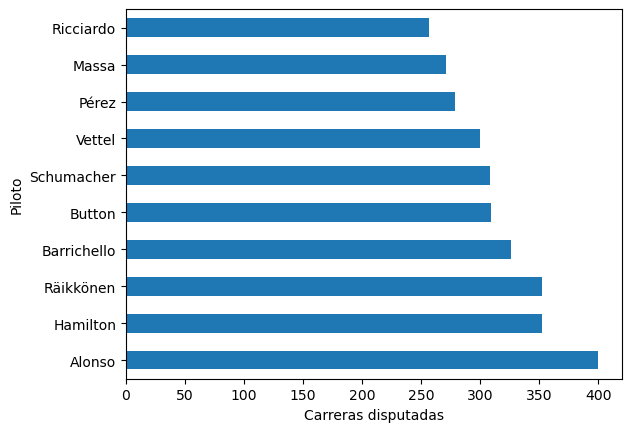

In [62]:
df_join_results_drivers = pd.merge(df_results, df_drivers, on='driverId')

(df_join_results_drivers.groupby(['driverId','surname'])['raceId'].count().reset_index().set_index('surname')
                        .drop('driverId', axis='columns')
                        .sort_values(by='raceId',ascending=False).head(10)
                        .plot(kind='barh', ylabel='Piloto', xlabel='Carreras disputadas', legend=False));

# Se ha realizado este proceso más 'engorroso' porque si solo agrupábamos por surname, existen dos pilotos que son Schumacher (padre e hijo), por lo que los datos que nos aparecían no eran correctos, se sumaban las carreras de ambos en un único registro

Para ver el estado de forma actual, vamos a ver los últimos 10 ganadores de nuestro dataset (recordemos que está hasta finales de 2024)

In [73]:
df_join_races_results = pd.merge(df_results,df_races,on='raceId').sort_values(by='date time',ascending=False)

ultimas_10_carreras = list(df_join_races_results.drop_duplicates(subset='date time').head(10)['name'])

df_join_races_results[(df_join_races_results['name'].isin(ultimas_10_carreras)) & (df_join_races_results['positionOrder']==1)].head(10).merge(df_drivers, on='driverId')[['surname','name']]

,surname,name
0,Sainz,Mexico City Grand Prix
1,Leclerc,United States Grand Prix
2,Norris,Singapore Grand Prix
3,Piastri,Azerbaijan Grand Prix
4,Leclerc,Italian Grand Prix
5,Norris,Dutch Grand Prix
6,Hamilton,Belgian Grand Prix
7,Piastri,Hungarian Grand Prix
8,Hamilton,British Grand Prix
9,Russell,Austrian Grand Prix


Yendo a términos generales, vamos a mostrar los 10 pilotos que acumulan más victorias.

In [77]:
df_ganadores = df_results[df_results['positionOrder']==1]

df_recuento_ganadores = df_ganadores.groupby('driverId')[['driverId']].count().rename(columns={'driverId':'recuento victorias'}).sort_values(by='recuento victorias',ascending=False).head(10).reset_index()

pd.merge(df_recuento_ganadores, df_drivers, on='driverId')[['forename','surname','nationality','recuento victorias']]

,forename,surname,nationality,recuento victorias
0,Lewis,Hamilton,British,105
1,Michael,Schumacher,German,91
2,Max,Verstappen,Dutch,61
3,Sebastian,Vettel,German,53
4,Alain,Prost,French,51
5,Ayrton,Senna,Brazilian,41
6,Fernando,Alonso,Spanish,32
7,Nigel,Mansell,British,31
8,Jackie,Stewart,British,27
9,Jim,Clark,British,25


Para contrastar, mostramos los 10 pilotos que más sesiones de calificación han ganado


In [80]:
df_ganadores_calificacion = df_results[df_results['grid']==1]

df_recuento_ganadores_cali = df_ganadores_calificacion.groupby('driverId')[['driverId']].count().rename(columns={'driverId':'recuento pole position'}).sort_values(by='recuento pole position',ascending=False).head(10).reset_index()

pd.merge(df_recuento_ganadores_cali, df_drivers, on='driverId')[['forename','surname','nationality','recuento pole position']]

,forename,surname,nationality,recuento pole position
0,Lewis,Hamilton,British,104
1,Michael,Schumacher,German,68
2,Ayrton,Senna,Brazilian,65
3,Sebastian,Vettel,German,57
4,Max,Verstappen,Dutch,40
5,Jim,Clark,British,34
6,Alain,Prost,French,33
7,Nigel,Mansell,British,32
8,Nico,Rosberg,German,30
9,Juan,Fangio,Argentine,29


Mostramos ahora los 10 pilotos que más vueltas rápidas han conseguido

In [83]:
df_mejores_vueltas = df_results[df_results['rank']==1]

df_recuento_mejores_vueltas = df_mejores_vueltas.groupby('driverId')[['driverId']].count().rename(columns={'driverId':'recuento mejores vueltas'}).sort_values(by='recuento mejores vueltas',ascending=False).head(10).reset_index()

pd.merge(df_recuento_mejores_vueltas, df_drivers, on='driverId')[['forename','surname','nationality','recuento mejores vueltas']]

,forename,surname,nationality,recuento mejores vueltas
0,Lewis,Hamilton,British,66
1,Kimi,Räikkönen,Finnish,42
2,Sebastian,Vettel,German,38
3,Max,Verstappen,Dutch,32
4,Fernando,Alonso,Spanish,25
5,Michael,Schumacher,German,21
6,Nico,Rosberg,German,20
7,Mark,Webber,Australian,19
8,Valtteri,Bottas,Finnish,19
9,Daniel,Ricciardo,Australian,17


Mostramos ahora los 10 pilotos que más posiciones, de media, han ganado **en las carreras finalizadas**. Es decir, de como empezaron en la parrilla de salida a como acabaron finalmente en la carrera. Como este dato puede verse afectado por pilotos que han competido muy pocas veces, vamos a utilizar solamente datos de aquellos pilotos que han finalizado al menos 50 carreras

In [94]:
df_carreras_finalizadas = df_results[df_results['milliseconds'] > 0]

df_recuento_carreras_finalizadas = df_carreras_finalizadas.groupby('driverId')[['driverId']].count()

pilotos_mas50_carreras_finalizadas = list(df_recuento_carreras_finalizadas[df_recuento_carreras_finalizadas['driverId']>50].rename(columns={'driverId':'recuento'}).reset_index()['driverId'])

df_carreras_finalizadas_y_mas_50 = df_join_results_drivers[(df_join_results_drivers['driverId'].isin(pilotos_mas50_carreras_finalizadas)) & (df_join_results_drivers['milliseconds'] > 0)].copy() #df_join_results_drivers ya lo teníamos creado de antes

df_carreras_finalizadas_y_mas_50['posicionesGanadas'] = df_carreras_finalizadas_y_mas_50['grid'] - df_carreras_finalizadas_y_mas_50['positionOrder']

df_top10_media_posiciones_ganadas = (df_carreras_finalizadas_y_mas_50.groupby('driverId')[['posicionesGanadas']].mean().sort_values(by='posicionesGanadas',ascending=False)
                                                                    .rename(columns={'posicionesGanadas':'media_posicionesGanadas'}).reset_index()
                                                                    .merge(df_drivers,on='driverId')
                                                                    .drop_duplicates(subset=['driverId'])[['forename','surname','nationality','media_posicionesGanadas']].head(10))

df_top10_media_posiciones_ganadas

,forename,surname,nationality,media_posicionesGanadas
0,Jean,Alesi,French,3.229508
1,Eddie,Irvine,British,2.862745
2,Niki,Lauda,Austrian,2.808824
3,Giancarlo,Fisichella,Italian,2.807229
4,Nick,Heidfeld,German,2.500000
5,Nelson,Piquet,Brazilian,2.465116
6,Riccardo,Patrese,Italian,2.421053
7,Lance,Stroll,Canadian,2.416667
8,Nigel,Mansell,British,2.188406
9,Sergio,Pérez,Mexican,2.160714


Por último, vamos a averiguar las 10 causas más frecuentes que han impedido terminar a los pilotos las carreras en condiciones normales

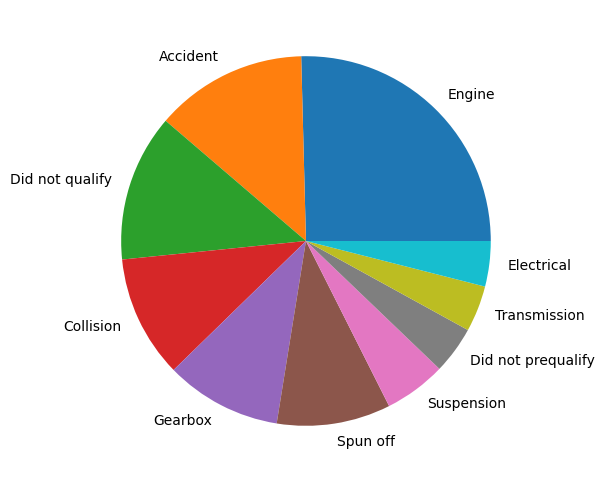

In [99]:
df_join_results_status = pd.merge(df_results,df_status,on='statusId')

df_join_results_status_not_finished = df_join_results_status[~df_join_results_status['status'].isin(['Finished','+1 Lap','+2 Laps','+3 Laps','+4 Laps'])] #Nos enfocamos en problemas o accidentes, no en si han quedado a más de 1 vuelta
df_join_results_status_not_finished['status'].value_counts().head(10).plot(kind='pie',figsize = (6,6),ylabel='');

### **2.1. Análisis resultados Lewis Hamilton vs Fernando Alonso**


Carreras finalizadas

In [104]:
df_join_status_drivers = pd.merge(df_results,df_status,on='statusId').merge(df_drivers,on='driverId')

df_results_ham = df_join_status_drivers[(df_join_status_drivers['code']=='HAM') & (df_join_status_drivers['statusId']==1)]
df_results_alo = df_join_status_drivers[(df_join_status_drivers['code']=='ALO') & (df_join_status_drivers['statusId']==1)]

print('Número de carreras terminadas por Hamilton: ', len(df_results_ham))
print('Número de carreras terminadas por Alonso: ', len(df_results_alo))

Número de carreras terminadas por Hamilton:  308
Número de carreras terminadas por Alonso:  257


Número de victorias, segundos puestos y terceros puestos

In [121]:
podio_hamilton = df_results_ham['positionOrder'].value_counts()[[1,2,3]]
podio_alonso = df_results_alo['positionOrder'].value_counts()[[1,2,3]]

df_podium = pd.concat([podio_hamilton,podio_alonso], axis=1)

cols = df_podium.columns.tolist()
cols[0] = 'Hamilton'
cols[1] = 'Alonso'
df_podium.columns = cols

df_podium

,Hamilton,Alonso
positionOrder,,
1,105,32
2,56,40
3,40,34


Número de veces que han ocupado los 4 primeros puestos en la parrilla de salida

In [124]:
df_results_ham_general = df_join_status_drivers[df_join_status_drivers['code']=='HAM']
df_results_alo_general = df_join_status_drivers[df_join_status_drivers['code']=='ALO']

parrilla_hamilton = df_results_ham_general['grid'].value_counts()[[1,2,3,4]]
parrilla_alonso = df_results_alo_general['grid'].value_counts()[[1,2,3,4]]

df_parrilla = pd.concat([parrilla_hamilton, parrilla_alonso], axis=1)

cols = df_parrilla.columns.to_list()
cols[0] = 'Hamilton'
cols[1] = 'Alonso'
df_parrilla.columns = cols

df_parrilla

,Hamilton,Alonso
grid,,
1,104,22
2,72,20
3,41,31
4,30,28


## **3. Escuderías**

In [135]:
df_constructors = pd.read_csv('data/constructors.csv', index_col = 0)

Top 10 escuderías que han ganado más carreras a lo largo de la historia de la competición

In [138]:
df_join_results_constructor = pd.merge(df_results,df_constructors,on='constructorId')

df_join_results_constructor_winners = df_join_results_constructor[df_join_results_constructor['positionOrder']==1]
df_join_results_constructor_winners[['name','nationality']].value_counts().head(10)

name        nationality
Ferrari     Italian        249
McLaren     British        184
Mercedes    German         128
Red Bull    Austrian       120
Williams    British        114
Team Lotus  British         45
Renault     French          35
Benetton    Italian         27
Brabham     British         23
Tyrrell     British         23
Name: count, dtype: int64

Puntos que ganaron Lewis Hamilton y Fernando Alonso con cada escudería

In [199]:
df_join_results_constructor_drivers = pd.merge(df_results,df_constructors,on='constructorId').merge(df_drivers,on='driverId')

df_join_results_constructor_drivers_HAM = df_join_results_constructor_drivers[df_join_results_constructor_drivers['code']=='HAM']
print('Puntos Hamilton\n',df_join_results_constructor_drivers_HAM.groupby(['name','nationality_x'])[['points']].sum().sort_values(by='points',ascending=False),'\n\n')

df_join_results_constructor_drivers_ALO = df_join_results_constructor_drivers[df_join_results_constructor_drivers['code']=='ALO']
print('Puntos Alonso\n',df_join_results_constructor_drivers_ALO.groupby(['name','nationality_x'])[['points']].sum().sort_values(by='points',ascending=False))

Puntos Hamilton
                         points
name     nationality_x        
Mercedes German         3876.5
McLaren  British         913.0 


Puntos Alonso
                               points
name           nationality_x        
Ferrari        Italian        1190.0
Renault        French          468.0
Aston Martin   British         260.0
McLaren        British         241.0
Alpine F1 Team French          162.0
Minardi        Italian           0.0


## **4. Circuitos**

In [148]:
df_circuits = pd.read_csv('data/circuits.csv', index_col='circuitId')

df_circuits.head()

,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


Vamos a mostrar los 10 circuitos más rápidos.

El criterio utilizado para valorar este concepto es que la media de máxima velocidad alcanzada de las 100 vueltas más rápidas sea más alta

In [164]:
df_join_circuits_races_results = pd.merge(df_circuits.reset_index(), df_races.reset_index(), on='circuitId').merge(df_results, on='raceId')

df_top_100_marcas = df_join_circuits_races_results.groupby('name_x').apply(lambda x: x.nlargest(100,'fastestLapSpeed'),include_groups=False)
df_top_100_marcas.groupby('name_x')['fastestLapSpeed'].mean().sort_values(ascending=False).head(10)

name_x
Autodromo Nazionale di Monza      250.743730
Jeddah Corniche Circuit           238.735870
Silverstone Circuit               235.304260
Circuit de Spa-Francorchamps      234.345370
Las Vegas Strip Street Circuit    228.723600
Red Bull Ring                     228.325320
Albert Park Grand Prix Circuit    228.075490
Losail International Circuit      224.856079
Suzuka Circuit                    223.791330
Autodromo Enzo e Dino Ferrari     220.481360
Name: fastestLapSpeed, dtype: float64

Y ahora los 10 más lentos

In [166]:
df_top_100_marcas.groupby('name_x')['fastestLapSpeed'].mean().sort_values().head(10)

name_x
Circuit de Monaco               159.093220
Marina Bay Street Circuit       176.451050
Korean International Circuit    190.791087
Fuji Speedway                   191.804805
Autódromo Hermanos Rodríguez    192.204840
Valencia Street Circuit         192.418870
Hungaroring                     195.786280
Circuit of the Americas         199.997720
Nürburgring                     200.250600
Indianapolis Motor Speedway     203.155071
Name: fastestLapSpeed, dtype: float64

Los 5 circuitos más rápidos para Lewis Hamilton y Alonso

In [210]:
df_join_results_ham_races_circuits = pd.merge(df_results_ham, df_races.reset_index(), on='raceId').merge(df_circuits.reset_index(), on='circuitId')
print('\nCircuitos más rápidos para Hamilton\n\n',df_join_results_ham_races_circuits.groupby('name_y')['fastestLapSpeed'].mean().sort_values(ascending=False).head(),'\n\n')

df_join_results_alo_races_circuits = pd.merge(df_results_alo, df_races.reset_index(), on='raceId').merge(df_circuits.reset_index(), on='circuitId')
print('Circuitos más rápidos para Alonso\n\n',df_join_results_alo_races_circuits.groupby('name_y')['fastestLapSpeed'].mean().sort_values(ascending=False).head())


Circuitos más rápidos Hamilton

 name_y
Autodromo Nazionale di Monza            245.335333
Jeddah Corniche Circuit                 241.342000
Autodromo Internazionale del Mugello    239.518000
Las Vegas Strip Street Circuit          233.227000
Circuit de Spa-Francorchamps            232.344750
Name: fastestLapSpeed, dtype: float64 


Circuitos más rápidos Alonso

 name_y
Autodromo Nazionale di Monza      243.802364
Jeddah Corniche Circuit           240.770500
Las Vegas Strip Street Circuit    231.191000
Silverstone Circuit               227.913714
Circuit de Spa-Francorchamps      225.914900
Name: fastestLapSpeed, dtype: float64


Circuitos donde obtuvieron Lewis Hamilton y Alonso, de media, mejor posición.

In [215]:
print('Mejor posición Hamilton\n\n',df_join_results_ham_races_circuits.groupby('name_y')['positionOrder'].mean().sort_values().head(),'\n')

print('Mejor posición Alonso\n\n',df_join_results_alo_races_circuits.groupby('name_y')['positionOrder'].mean().sort_values().head(),'\n')

Mejor posición Hamilton

 name_y
Autodromo Internazionale del Mugello    1.0
Autódromo Internacional do Algarve      1.0
Losail International Circuit            1.0
Indianapolis Motor Speedway             1.0
Circuit Paul Ricard                     1.5
Name: positionOrder, dtype: float64 

Mejor posición Alonso

 name_y
Fuji Speedway                     1.000000
Circuit de Barcelona-Catalunya    3.181818
Nürburgring                       3.250000
Indianapolis Motor Speedway       3.500000
Korean International Circuit      3.750000
Name: positionOrder, dtype: float64 



Todos los circuitos en un mapa 

In [144]:
import folium

tiles = 'OpenStreetMap'

europe_figure = folium.Figure(width=600, height=600)
europe_map = folium.Map(location=[50, 6], tiles=tiles, zoom_start=6).add_to(europe_figure)

for _,circuit in df_circuits.iterrows():
    folium.Marker([circuit['lat'], circuit['lng']], popup=circuit['name']).add_to(europe_map)
    
europe_figure

## **5. Rivales vs Hamilton**

In [223]:
carreras_competidas_hamilton = df_results[df_results['driverId']==hamilton_id]['raceId'].to_list() # Ya teníamos el id de Hamilton de ejercicios previos

rivales_hamilton = df_results[df_results['raceId'].isin(carreras_competidas_hamilton)]['driverId'].drop_duplicates().to_list()

df_drivers[df_drivers.index.isin(rivales_hamilton)].drop(hamilton_id) #Eliminamos id de hamilton

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
...,...,...,...,...,...,...,...,...
857,piastri,81.0,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
858,sargeant,2.0,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
859,lawson,40.0,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


10 rivales a los que más veces se ha enfrentado Lewis Hamilton

In [233]:
(df_results[df_results['raceId'].isin(df_results_ham['raceId']) & (df_results["driverId"] != hamilton_id)]
                      .groupby('driverId').size().nlargest(10).to_frame().rename(columns={0:'times'})
                      .merge(df_drivers, on='driverId'))

,times,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
4,268,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
20,260,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
815,252,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez
817,232,ricciardo,3.0,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
822,224,bottas,77.0,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas
8,217,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
807,202,hulkenberg,27.0,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
830,191,max_verstappen,33.0,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
832,190,sainz,55.0,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


Vamos a construir una tabla en la que cada fila represente cada una de las carreras concluidas por Lewis Hamilton, cada columna un piloto (su driverId) que haya participado y concluido alguna de esas carreras, y el resultado la posición del piloto. De esta forma, podemos comprobar los rivales que más veces han batido a Lewis Hamilton o más veces han sido batidos

In [243]:
carreras_finalizadas_ham = df_results_ham['raceId'].to_list() #Ya teniamos df_results_ham de ejercicios previos

competidores = df_results[(df_results['raceId'].isin(carreras_finalizadas_ham))&(~df_results['time'].isna())]['driverId'].to_list()

df_carreras_competidores = df_results[(df_results['raceId'].isin(carreras_finalizadas_ham))&(df_results['driverId'].isin(competidores))]

df_ha_vs_other = pd.pivot_table(df_carreras_competidores, values='position', index='raceId', columns='driverId')
     
df_ha_vs_other

driverId,1,2,3,4,5,6,7,8,9,10,...,852,853,854,855,856,857,858,859,860,861
raceId,,,,,,,,,,,,,,,,,,,,,
2,7.0,2.0,8.0,11.0,NaN,12.0,10.0,14.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,12.0,15.0,9.0,5.0,NaN,11.0,10.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,19.0,9.0,8.0,12.0,NaN,13.0,6.0,18.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13.0,11.0,5.0,10.0,14.0,12.0,18.0,9.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,11.0,4.0,NaN,5.0,9.0,NaN,2.0,13.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,8.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,NaN,NaN,20.0,NaN,4.0,16.0,NaN,NaN,NaN
1136,5.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.0,NaN,2.0,NaN,NaN,NaN,12.0
1137,9.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,1.0,NaN,NaN,10.0,8.0


In [248]:
posiciones_hamilton = df_ha_vs_other[hamilton_id]

df_join_hamilton_resto = (pd.merge(df_results[(df_results['raceId'].isin(carreras_competidas_hamilton))
                                   &(df_results['driverId']!=hamilton_id)], posiciones_hamilton ,on='raceId'))

df_rivales_vencidos = df_join_hamilton_resto[df_join_hamilton_resto[1] < df_join_hamilton_resto['position']]

(df_rivales_vencidos.groupby('driverId')[['driverId']].count()
                    .rename(columns={'driverId':'veces_batido_por_hamilton'})
                    .sort_values(by='veces_batido_por_hamilton',ascending=False).head(10).reset_index()
                    .merge(df_drivers,on='driverId')[['driverRef','veces_batido_por_hamilton']])

,driverRef,veces_batido_por_hamilton
0,perez,191
1,ricciardo,180
2,bottas,176
3,alonso,164
4,hulkenberg,163
5,raikkonen,157
6,vettel,152
7,kevin_magnussen,136
8,stroll,124
9,sainz,122


Y los 10 rivales que han batido más veces a Lewis Hamilton. 

In [252]:
df_rivales_ganadores = df_join_hamilton_resto[df_join_hamilton_resto[1] > df_join_hamilton_resto['position']]

(df_rivales_ganadores.groupby('driverId')[['driverId']].count()
                     .rename(columns={'driverId':'veces_hamilton_fue_vencido'})
                     .sort_values(by='veces_hamilton_fue_vencido',ascending=False).head(10).reset_index()
                     .merge(df_drivers, on='driverId')[['driverRef','veces_hamilton_fue_vencido']])

,driverRef,veces_hamilton_fue_vencido
0,vettel,76
1,max_verstappen,71
2,alonso,65
3,rosberg,36
4,leclerc,36
5,sainz,34
6,perez,34
7,raikkonen,34
8,webber,31
9,norris,30


## **6. Alonso vs el resto**

In [257]:
carreras_competidas_alonso = df_results[df_results['driverId']==alonso_id]['raceId'].to_list() # Ya teníamos el id de Alonso de ejercicios previos

rivales_alonso = df_results[df_results['raceId'].isin(carreras_competidas_alonso)]['driverId'].drop_duplicates().to_list()

df_drivers[df_drivers.index.isin(rivales_alonso)].drop(alonso_id) #Eliminamos id de Alonso

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
...,...,...,...,...,...,...,...,...
857,piastri,81.0,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
858,sargeant,2.0,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
859,lawson,40.0,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


10 rivales a los que más veces se ha enfrentado Fernando Alonso

In [260]:
(df_results[df_results['raceId'].isin(df_results_alo['raceId']) & (df_results["driverId"] != alonso_id)]
                      .groupby('driverId').size().nlargest(10).to_frame().rename(columns={0:'times'})
                      .merge(df_drivers, on='driverId'))

,times,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
1,202,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
18,192,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
13,181,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
8,176,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
17,166,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
20,160,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,155,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
815,144,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez
22,130,barrichello,NaN,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello


Vamos a construir una tabla en la que cada fila represente cada una de las carreras concluidas por Fernando Alonso, cada columna un piloto (su driverId) que haya participado y concluido alguna de esas carreras, y el resultado la posición del piloto. De esta forma, podemos comprobar los rivales que más veces han batido a Fernando Alonso o más veces han sido batidos

In [264]:
carreras_finalizadas_alo = df_results_alo['raceId'].to_list() #Ya teniamos df_results_alo de ejercicios previos

competidores = df_results[(df_results['raceId'].isin(carreras_finalizadas_alo))&(~df_results['time'].isna())]['driverId'].to_list()

df_carreras_competidores = df_results[(df_results['raceId'].isin(carreras_finalizadas_alo))&(df_results['driverId'].isin(competidores))]

df_fa_vs_other = pd.pivot_table(df_carreras_competidores, values='position', index='raceId', columns='driverId')
     
df_fa_vs_other

driverId,1,2,3,4,5,6,7,8,9,10,...,852,853,854,855,856,857,858,859,860,861
raceId,,,,,,,,,,,,,,,,,,,,,
1,NaN,10.0,6.0,5.0,NaN,NaN,8.0,15.0,14.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,12.0,15.0,9.0,5.0,NaN,11.0,10.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,19.0,9.0,8.0,12.0,NaN,13.0,6.0,18.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9.0,7.0,8.0,5.0,NaN,13.0,NaN,NaN,11.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12.0,11.0,6.0,7.0,NaN,15.0,8.0,3.0,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,1.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,18.0,NaN,4.0,11.0,NaN,NaN,NaN
1133,3.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,19.0,NaN,1.0,17.0,NaN,NaN,NaN
1134,1.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,NaN,2.0,17.0,NaN,NaN,NaN


In [271]:
posiciones_alonso = df_fa_vs_other[alonso_id]

df_join_alonso_resto = (pd.merge(df_results[(df_results['raceId'].isin(carreras_competidas_alonso))
                                 &(df_results['driverId']!=alonso_id)], posiciones_alonso ,on='raceId'))

df_rivales_vencidos = df_join_alonso_resto[df_join_alonso_resto[alonso_id] < df_join_alonso_resto['position']]

(df_rivales_vencidos.groupby('driverId')[['driverId']].count()
                    .rename(columns={'driverId':'veces_batido_por_alonso'})
                    .sort_values(by='veces_batido_por_alonso',ascending=False).head(10).reset_index()
                    .merge(df_drivers,on='driverId')[['driverRef','veces_batido_por_alonso']])

,driverRef,veces_batido_por_alonso
0,massa,121
1,button,112
2,rosberg,92
3,hulkenberg,92
4,raikkonen,85
5,webber,85
6,barrichello,84
7,trulli,79
8,perez,75
9,ricciardo,75


Y los 10 rivales han batido más veces a Fernando Alonso. 

In [285]:
df_rivales_ganadores = df_join_alonso_resto[df_join_alonso_resto[alonso_id] > df_join_alonso_resto['position']]

(df_rivales_ganadores.groupby('driverId')[['driverId']].count()
                     .rename(columns={'driverId':'veces_alonso_fue_vencido'})
                     .sort_values(by='veces_alonso_fue_vencido',ascending=False).head(10).reset_index()
                     .merge(df_drivers, on='driverId')[['driverRef','veces_alonso_fue_vencido']])

,driverRef,veces_alonso_fue_vencido
0,hamilton,106
1,vettel,82
2,raikkonen,61
3,max_verstappen,59
4,perez,50
5,button,50
6,rosberg,42
7,webber,39
8,leclerc,36
9,massa,36


## **7. Conclusiones clave**

**1.- Existe una fuerte relación entre el rendimiento en clasificación y las victorias en carrera**
    
El grupo de pilotos con más poles es muy similar al de pilotos con más victorias, lo que sugiere que partir desde las primeras posiciones de la parrilla aumenta significativamente las probabilidades de ganar una carrera.

**2.- Las vueltas rápidas no siempre se traducen en victorias**

Kimi Räikkönen destaca por acumular un gran número de vueltas rápidas, mientras que su número de victorias es relativamente bajo en comparación. En contraste, pilotos como Michael Schumacher presentan menos vueltas rápidas pero un mayor número de triunfos, lo que refleja diferentes perfiles de rendimiento y estrategias de carrera.

**3.- Ganar muchas posiciones durante una carrera no implica mayor éxito competitivo**

Los pilotos que más posiciones ganan a lo largo de una carrera no coinciden con aquellos que acumulan más victorias, probablemente porque partir desde posiciones retrasadas ofrece más oportunidades de adelantamiento, pero reduce las opciones reales de ganar.

**4.- La posición de salida ayuda a explicar las diferencias en el número de victorias**

Lewis Hamilton comienza las carreras desde la pole position con mucha mayor frecuencia que Fernando Alonso, lo que aporta contexto a la diferencia en el número total de victorias entre ambos pilotos.

**5.- Un número reducido de escuderías concentra la mayoría de las victorias**
    
A lo largo del periodo analizado, cinco escuderías dominan claramente el número de carreras ganadas, mientras que el resto de equipos se sitúan muy por detrás, reflejando una fuerte concentración del éxito en la Fórmula 1.

**6.- Las características de los circuitos influyen de forma directa en la velocidad media de carrera**
    
Circuitos como Monza y Jeddah destacan por registrar las mayores velocidades medias por vuelta, mientras que Mónaco y Marina Bay se sitúan entre los más lentos, probablemente debido a diferencias en el diseño del trazado y la densidad de curvas.

**7.- El análisis cara a cara muestra una ventaja clara en carreras compartidas**
    
En las carreras en las que ambos pilotos finalizaron, Lewis Hamilton terminó por delante de Fernando Alonso en más de 100 ocasiones. Este resultado debe interpretarse teniendo en cuenta el solapamiento temporal de sus carreras y el rendimiento de los monoplazas en cada etapa.